E-commerce is a huge business sector that allows customers to access a variety of goods and services with a few clicks. Many popular shopping platforms such as Amazon or Alibaba process millions of transactions annually. In recent years, due to the corona disease, online shopping has increased dramatically, therefore, the online shopping market has become very competitive and it is important for strong and innovative online shopping platforms.   
One possible way to increase online shopping transactions is to understand and respond to customers' behavior. According to sufficient online shopping data and machine learning techniques, it is possible to determine the purchase intention of website visitors, so in this exercise, we want to use machine learning algorithms in Marketing Analytics, which is one of the topics discussed in recent years. let's get to know each other more.

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `customers_intention.csv` file. This dataset contains various information related to customer behavior on online shopping websites, which helps us to perform marketing analysis and understand related KPIs and metrics. This dataset contains feature vectors belonging to 12330 sessions, in the sense that each row shows the behavior of a customer to buy a product and has a total of 10 numerical features and 8 categorical features.
Use the "Revenue" property as the class label.

in this section, what you have to do is as follows:
 - lead the dataset
 - print information of the dataset
 - plot number of data for each label in `Revenue` column.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load dataset
import pandas as pd
customers_intention = pd.read_csv('customers_intention.csv')

In [3]:

# dataset information

# Display the structure of the dataset
customers_intention.info()

# Display the summary statistics of the numerical features
customers_intention.describe()

print(customers_intention.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

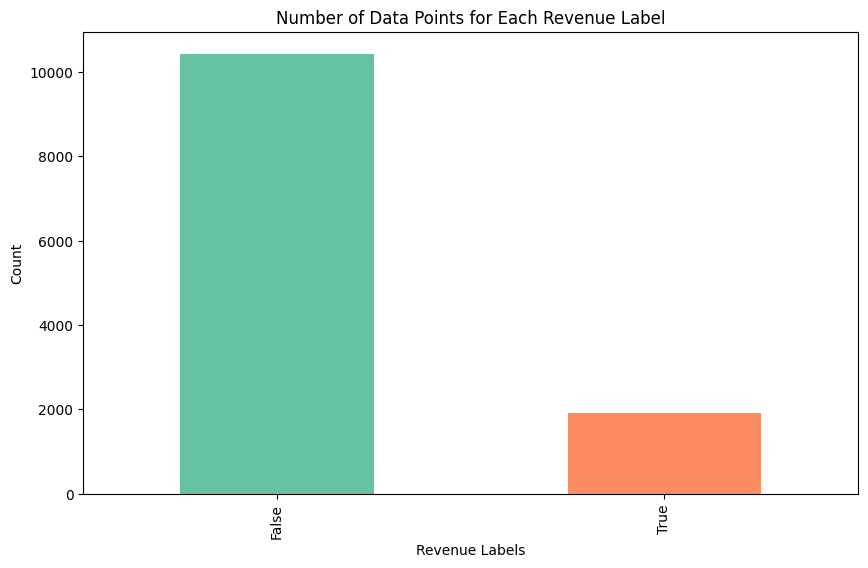

In [4]:
# plot number of data for each class label
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Count the number of data points for each label in the Revenue column
label_counts = customers_intention['Revenue'].value_counts()

# Plot the number of data points for each label
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2')
label_counts.plot(kind='bar', color=colors)
plt.xlabel('Revenue Labels')
plt.ylabel('Count')
plt.title('Number of Data Points for Each Revenue Label')
plt.show()

## Data Cleaning

Now, after reading the data, it is time to clean the data. At this stage, we need to do the necessary pre-processing to clean the dataset. Some of the things we suggest you do are as follows:
- Identification of null values
- Handling the null values of each column in an appropriate way
- one-hot encoding of categorical columns. you can use this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for one-hot encoding
And any pre-processing you want.

In [5]:
# identify and handle nan values
null_counts = customers_intention.isnull().sum()
print(null_counts)

# drop none
customers_intention = customers_intention.dropna()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [6]:
# categorical encoding and one hot encoding

categorical_cols = ['Month', 'VisitorType']

customers_intention[categorical_cols] = customers_intention[categorical_cols].astype('category')

# Perform one-hot encoding
customers_intention_encoded = pd.get_dummies(customers_intention, columns=categorical_cols)

print(customers_intention_encoded.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...      False       False   
1         0.00       0.10         0.0         0.0 

## Train/Test Split
- Divide the data into two parts, train and test. Assign `80%` of the data to the train section.
    - split in a `stratified` fashion. (Hint: you need to change a parameter in the corresponding method)

In [7]:
# import train test split from sklearn
from sklearn.model_selection import train_test_split

X = customers_intention_encoded.drop('Revenue', axis=1)
y = customers_intention_encoded['Revenue']

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (9864, 28)
Test set shape: (2466, 28)


## Classification Using Regression

- Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
- Using a regression model (univariate, multivariate, linear, polynomial, etc.), predict whether a cutomer's visit will lead to a purchase or not.
- How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number?

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

customers_intention_encoded['Purchase'] = customers_intention_encoded['Revenue'].map({True: 1, False: -1})

# Split the data into train and test sets
X = customers_intention_encoded.drop(['Revenue', 'Purchase'], axis=1)
y = customers_intention_encoded['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Create and train the linear regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

# Convert predictions to binary labels based on a threshold
y_pred_binary = [1 if val >= 0 else -1 for val in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


Accuracy: 0.8698296836982968


## Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with).


in this section you ar goinig to:
- plot datapoints in 2 dimensions using PCA
- Choose the best number of dimensions for PCA by plotting [cumulative explained variance ratio](https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c#:~:text=The%20Cumulative%20Explained%20Variance%20plot%20is%20a%20graphical%20representation%20that,the%20variance%20in%20the%20data.)
- Apply pca to the dataset with the number of dimensions you obtained in the previous section

*`don't remember you to standardize data before PCA transformation!`*

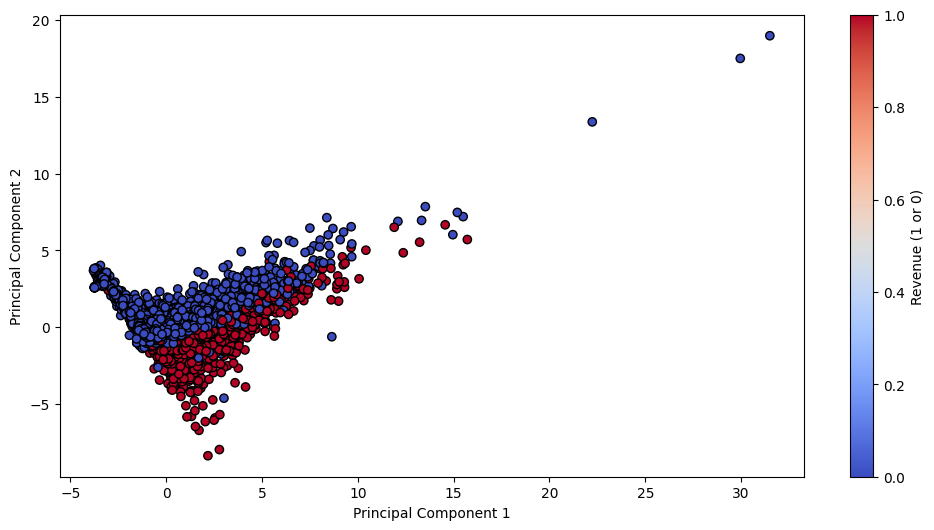

In [10]:
# plot datapoints in 2 dimensions using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = customers_intention_encoded.drop('Revenue', axis=1)
y = customers_intention_encoded['Revenue']

# Standardize the data
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X=X[numerical_columns])


# Apply PCA to reduce to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Plot the data points in 2D
plt.figure(figsize=(12, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap="coolwarm", edgecolor='black')
plt.colorbar(label='Revenue (1 or 0)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

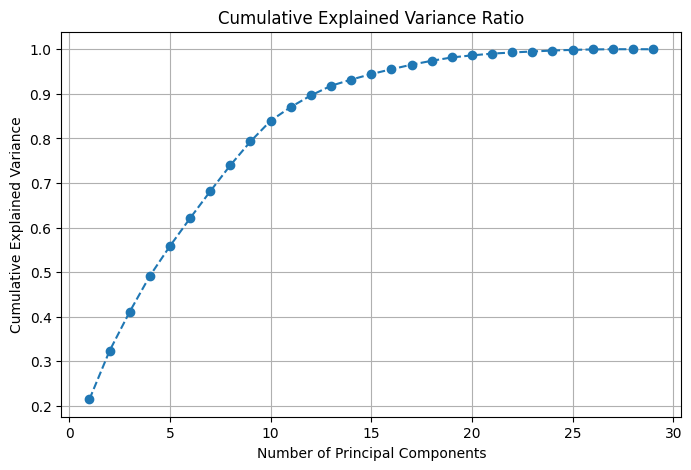

In [11]:
# Choose the best number of dimensions for PCA

# Apply PCA to the dataset without specifying the number of components
pca = PCA()
pca.fit(X)

# Plot the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [12]:
# Apply pca

# Choose the number of components that explain at least 95% of the variance
optimal_num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_num_components)
X_pca_optimal = pca_optimal.fit_transform(X)

print(f'Optimal number of dimensions: {optimal_num_components}')

Optimal number of dimensions: 16


## Over-Sampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

in this section you are going to use `SMOTE` method for over-sampling data to get equal number of data for each data. After applying SMOTE plot number of data for each class again to see the diffrence.
- [over-smapling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [13]:
# import  imblearn library for SMOTE
from imblearn.over_sampling import SMOTE

In [14]:
# Apply SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca_optimal, y)


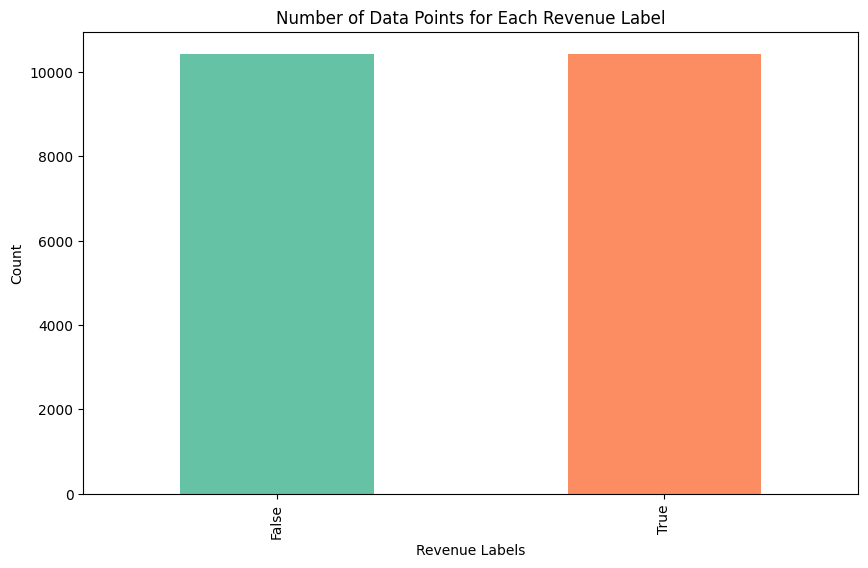

In [15]:
# plot number of data for each class
# Count the number of data points for each label in the Revenue column
label_counts = y_resampled.value_counts()

# Plot the number of data points for each label
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2')
label_counts.plot(kind='bar', color=colors)
plt.xlabel('Revenue Labels')
plt.ylabel('Count')
plt.title('Number of Data Points for Each Revenue Label')
plt.show()

## Training Classifiers

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

in this section you are going to train several cllassifiers like:
- `SVM`
- `KNN`
- `Logistic Regression`
- `Decision Tree`

Use the dimensionally reduced `train` data to train the specified classifiers.
- for each classifier use `gridsearch` to find best hyper parameters.
    - use `cross validation` for grid search
- after finding best parameters for each classifier, use them to train a classifier with founded parameters.
    - again train your best classifiers with `cross valdiation`
- use a bar plot to show each classifier's `accuracy`, `precision`, `f1` and `roc_auc`.

In [16]:
# Import Necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, make_scorer

In [17]:
# Train classifiers

# Define parameter grids for each classifier
# param_grids = {
#     'SVM': {
#         'C': [0.1, 1, 10, 100],
#         'gamma': [1, 0.1, 0.01, 0.001],
#         'kernel': ['linear', 'rbf']
#     },
#     'KNN': {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance']
#     },
#     'LogisticRegression': {
#         'C': [0.1, 1, 10, 100],
#         'solver': ['liblinear', 'lbfgs']
#     },
#     'DecisionTree': {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10]
#     }
# }

# # Define classifiers
# classifiers = {
#     'SVM': SVC(probability=True),
#     'KNN': KNeighborsClassifier(),
#     'LogisticRegression': LogisticRegression(),
#     'DecisionTree': DecisionTreeClassifier()
# }

# # Find best parameters using GridSearchCV
# best_estimators = {}
# for name, clf in classifiers.items():
#     grid_search = GridSearchCV(clf, param_grids[name], cv=2, scoring='accuracy')
#     grid_search.fit(X_resampled, y_resampled)
#     best_estimators[name] = grid_search.best_estimator_
#     print(f"Best parameters for {name}: {grid_search.best_params_}")

# classifiers and their param grids
classifiers = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}
param_grids = {
    'SVM': {
        'C': [1,10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [5, 10, 15]
    },
    'Logistic Regression': {
        'C': [0.1, 1,10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20,30]
    }
}

# find best params for each classifier
best_models = {}
for cl_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[cl_name], cv=5, scoring='accuracy',n_jobs = 16)
    grid_search.fit(X_pca_2d, y)
    best_models[cl_name] = grid_search.best_estimator_
    print(f"Best parameters for {cl_name}: {grid_search.best_params_}")


# evaluate best classifier

scores = {'Classifier Name': [],'accuracy':[],'precision':[],'f1 score':[],'roc_auc':[]}

for cl_name, clf in best_models.items():
    accuracy = cross_val_score(clf, X_pca_2d, y, cv=5, scoring='accuracy').mean()

    precision = cross_val_score(clf, X_pca_2d, y, cv=5, scoring='precision').mean()

    f1_score = cross_val_score(clf,X_pca_2d, y, cv=5, scoring='f1').mean()

    roc_auc = cross_val_score(clf, X_pca_2d, y, cv=5, scoring='roc_auc').mean()

    scores['Classifier Name'].append(cl_name)
    scores['accuracy'].append(accuracy)
    scores['precision'].append(precision)
    scores['f1 score'].append(f1_score)
    scores['roc_auc'].append(roc_auc)

#convert scores to pandas data frame
scores_df = pd.DataFrame(scores)
scores_df


Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best parameters for KNN: {'n_neighbors': 15}
Best parameters for Logistic Regression: {'C': 10}
Best parameters for Decision Tree: {'max_depth': 10}


,Classifier Name,accuracy,precision,f1 score,roc_auc
0,SVM,0.961476,0.899004,0.872188,0.969624
1,KNN,0.960827,0.891694,0.870851,0.966387
2,Logistic Regression,0.959124,0.903626,0.862120,0.974790
3,Decision Tree,0.947040,0.845095,0.824108,0.898843


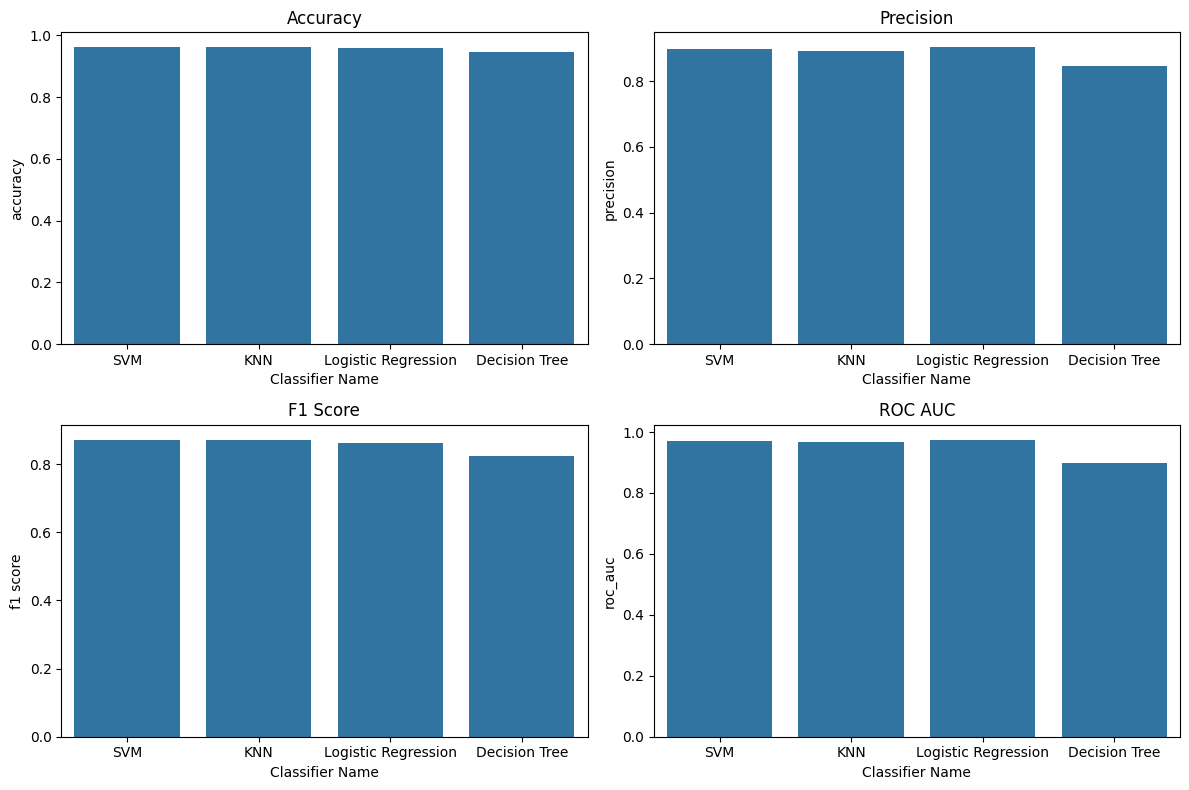

In [19]:
# bar plot for scores
import seaborn as sb

_, axes = plt.subplots(2, 2, figsize=(12, 8))

sb.barplot(x='Classifier Name', y='accuracy', data=scores_df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

sb.barplot(x='Classifier Name', y='precision', data=scores_df, ax=axes[0, 1])
axes[0, 1].set_title('Precision')

sb.barplot(x='Classifier Name', y='f1 score', data=scores_df, ax=axes[1, 0])
axes[1, 0].set_title('F1 Score')

sb.barplot(x='Classifier Name', y='roc_auc', data=scores_df, ax=axes[1, 1])
axes[1, 1].set_title('ROC AUC')
plt.tight_layout()
plt.show()


## Test your Model and Report results

choose the best model from last section based on the evalutiona metrics and bar plots and after that train the best classifier based on train data and test it's performance on test data. With this, we can see how good the model is on unseen data.

- print `classification report` and plot `confusion matrix` based on your model's predictions and the real labels.

In [20]:
# import necessary Libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
# train the best model again and evaluate it on test data
# best model is SVM if we calculate mean of sum of all scores
best_model = best_models['SVM']
best_model.fit(X_train, y_train)

# Test the model on the test data
predicted_y = best_model.predict(X_test)

In [22]:
# classification report
print("Classification Report:")
print(classification_report(y_test, predicted_y))

Classification Report:
              precision    recall  f1-score   support

          -1       0.85      1.00      0.92      2084
           1       0.89      0.02      0.04       382

    accuracy                           0.85      2466
   macro avg       0.87      0.51      0.48      2466
weighted avg       0.85      0.85      0.78      2466



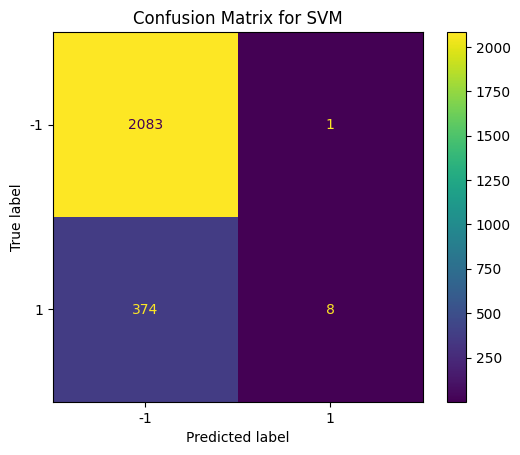

In [23]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_y)
cMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
cMatrix.plot()
plt.title(f'Confusion Matrix for SVM')
plt.show()

## Clustering

When analyzing customer behavior, clustering algorithms can help identify groups of customers with similar characteristics. Two popular clustering methods are K-means and DBSCAN.  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

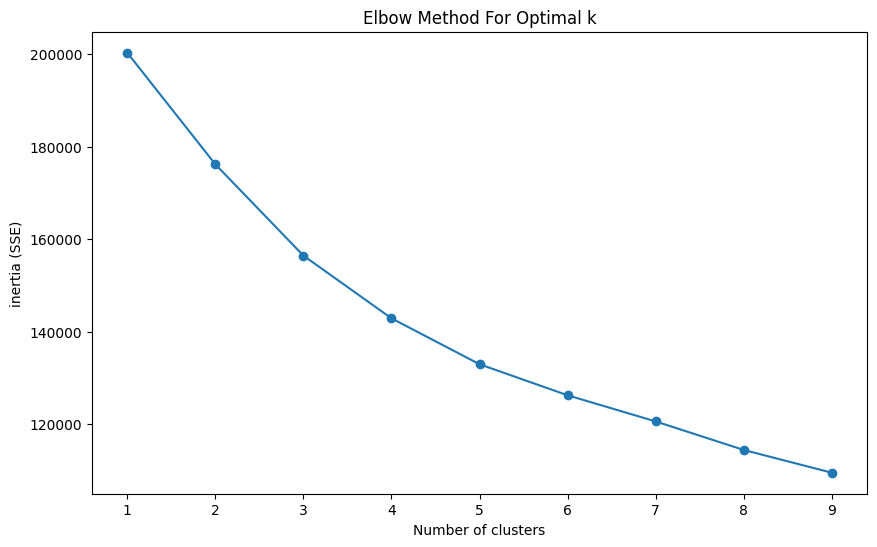

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
#Kmeans (Use a method for finding optimal number of clusters)
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

scaler = StandardScaler()
X_standard = scaler.fit_transform(X_resampled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standard)

inertias = []
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)

    inertias.append(kmeanModel.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('inertia (SSE)')
plt.show()
# according to plot, optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_standard)

<ipython-input-27-4fb19925ae23>:62: UserWarning: 
The palette list has fewer values (118) than needed (119) and will cycle, which may produce an uninterpretable plot.
  sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_dbscan, palette=palette_dbscan, ax=axes[1], legend='full', alpha=0.6, edgecolor='k')


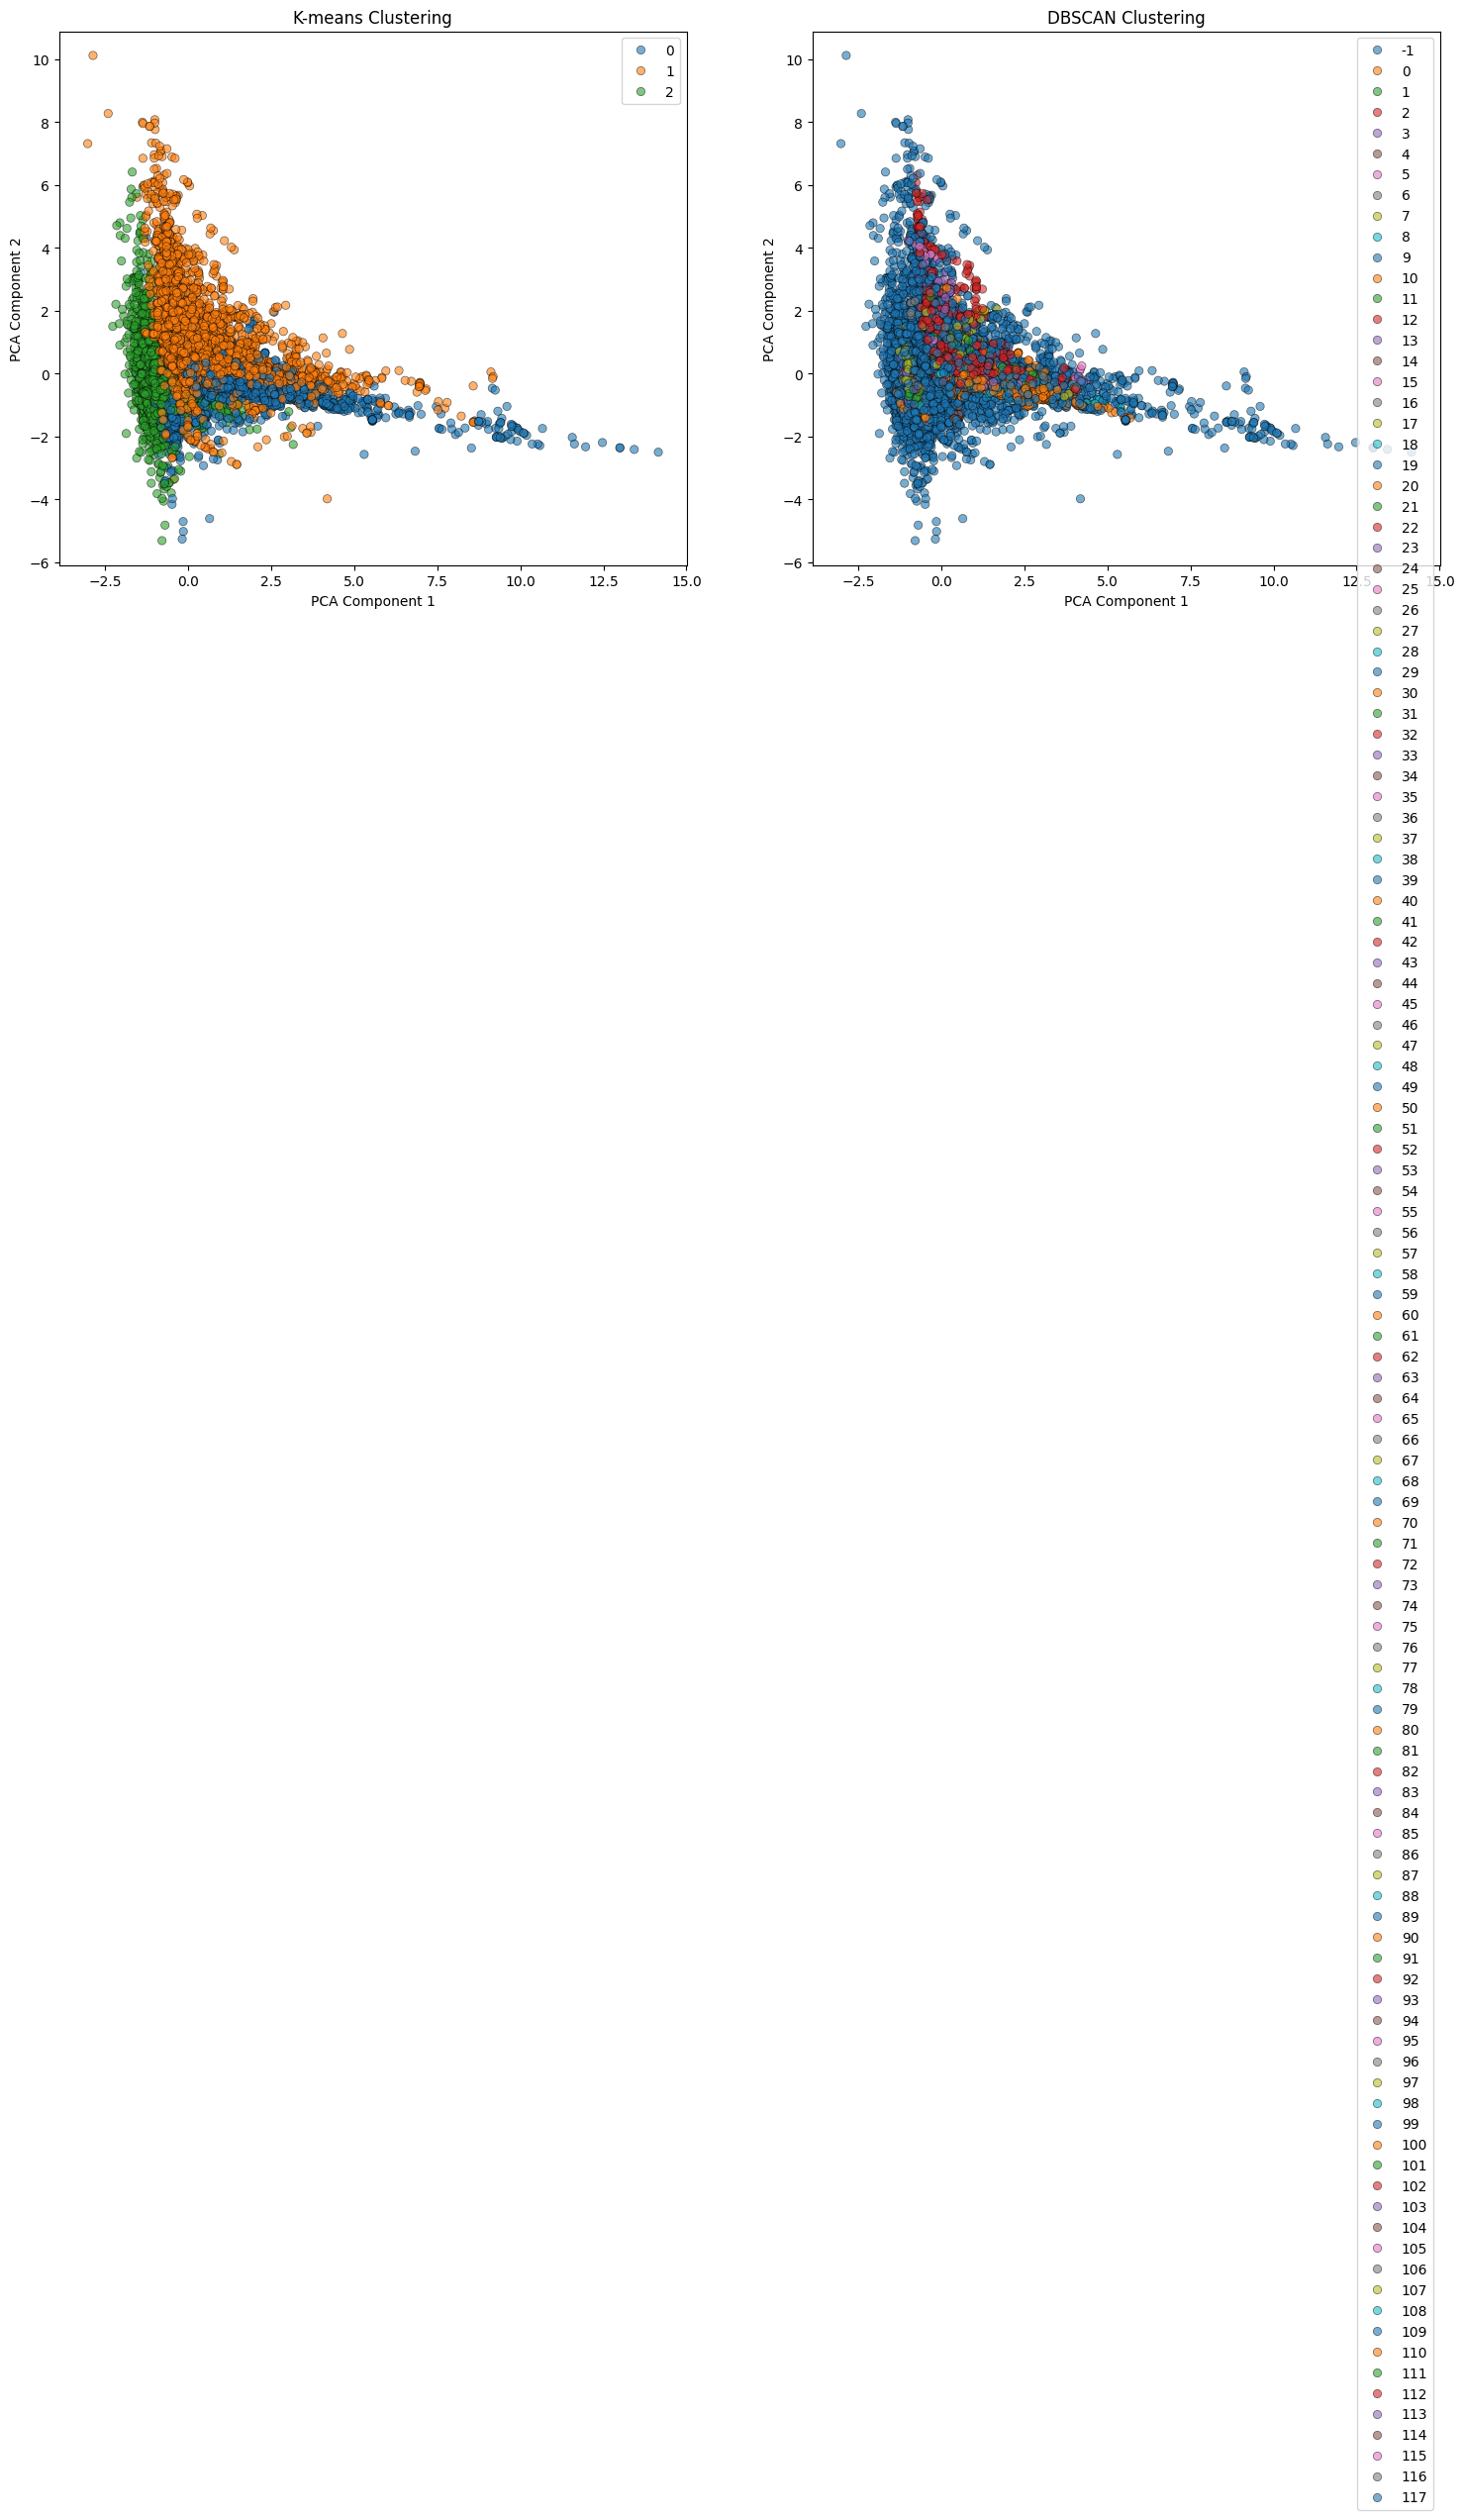

In [27]:
# # #DBSCAN

import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Assuming X_standard is your standardized dataset and X_pca is the result of PCA transformation on X_standard

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X_standard)

# Assuming clusters_kmeans is already defined from K-means clustering

# Define a colormap with a limited number of distinct colors
palette = sb.color_palette("tab10", np.unique(clusters_kmeans).max() + 1)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot K-means clusters
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette=palette, ax=axes[0], legend='full', alpha=0.6, edgecolor='k')
axes[0].set_title('K-means Clustering')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# Define a colormap with a limited number of distinct colors for DBSCAN
palette_dbscan = sb.color_palette("tab10", np.unique(clusters_dbscan).max() + 1)

# Plot DBSCAN clusters
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_dbscan, palette=palette_dbscan, ax=axes[1], legend='full', alpha=0.6, edgecolor='k')
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.show()
